# Forma analítica de hallar los óptimos: en Sympy

De forma analítica, los óptimos de una función se pueden encontrar usando cálculo diferencial. Veamos como:

## Pasos para encontrar óptimos de una función univariada $f(x)$:
1. **Primera Derivada:** Calcula la $f'(x)$ de la función.

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Definimos la variable y la función
x = sp.symbols('x')
f = x**3 - 6*x**2 + 4*x + 12

# Calculamos la primera derivada
f_prime = sp.diff(f, x)
f_prime


3*x**2 - 12*x + 4

2. **Puntos Criticos:** Encuentra los puntos críticos de la función resolviendo la ecuación $f'(x)=0$. Estos puntos son candidatos a ser máximos o mínimos locales.

In [ ]:
# Encuentra los puntos críticos resolviendo f'(x) = 0
critical_points = sp.solve(f_prime, x)
critical_points

[2 - 2*sqrt(6)/3, 2*sqrt(6)/3 + 2]

3. **Segunda derivada (opcional pero útil):** Calcula la segunda derivada $f''(x)$. Esta derivada te puede ayudar a determinar la naturaleza de los puntos críticos:
* Si $f''(x) > 0$ en un punto crítico $x=c$, entonces $f$ tiene un mínimo local en $c$.
* Si $f''(x) < 0$ en un punto crítico $x=c$, entonces $f$ tiene un máximo local en $c$.
* Si $f''(x) = 0$, la segunda derivada no es concluyente y se necesita otro método para determinar la naturaleza del punto.

In [ ]:
# Calculamos la segunda derivada
f_double_prime = sp.diff(f_prime, x)
f_double_prime

6*x - 12

In [ ]:
# Determinamos la naturaleza de los puntos críticos
nature_of_critical_points = []
for point in critical_points:
    if f_double_prime.subs(x, point) > 0:
        nature = "mínimo"
    elif f_double_prime.subs(x, point) < 0:
        nature = "máximo"
    else:
        nature = "inconclusivo"
    nature_of_critical_points.append(nature)


In [ ]:
print(critical_points)
print(nature_of_critical_points)

[2 - 2*sqrt(6)/3, 2*sqrt(6)/3 + 2]
['máximo', 'mínimo']


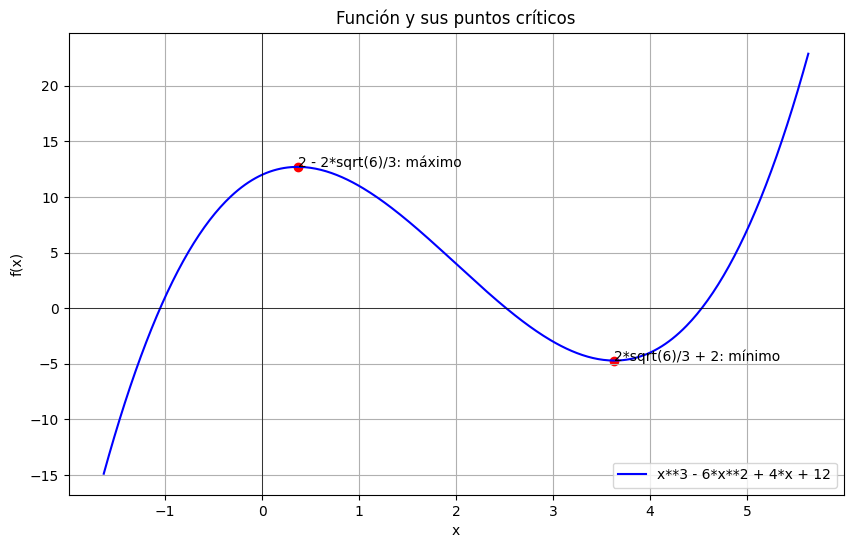

In [ ]:
# Graficamos la función y los puntos críticos
f_lambda = sp.lambdify(x, f, "numpy")
x_vals = np.linspace(float(min(critical_points)) - 2, float(max(critical_points)) + 2, 400)
y_vals = f_lambda(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=str(f), color='blue')
for point, nature in zip(critical_points, nature_of_critical_points):
    plt.scatter(point, f.subs(x, point), color='red')
    plt.text(point, f.subs(x, point), f'{point}: {nature}')

plt.title("Función y sus puntos críticos")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

### Tarea

Realice en `Sympy` el código para realizar el análisis de optimización para funciones de N-variables.